# THE H1N1 AND SEASONAL FLU VACCINES PROJECT

As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. Your audience could be someone guiding those public health efforts.
The *CRoss-Industry Standard Process for Data Mining (CRISP-DM)* methodology will be used inthis project

# BUSINESS UNDERSTANDING

Good questions for this stage include:

Who are the stakeholders in this project? Who will be directly affected by the creation of this project?

What business problem(s) will this Data Science project solve for the organization?

What problems are inside the scope of this project?

What problems are outside the scope of this project?

What data sources are available to us?

What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?

Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

## DATA UNDERSTANDING

Consider the following questions when working through this stage:

What data is available to us? Where does it live? Do we have the data, or can we scrape/buy/source the data from somewhere else?

Who controls the data sources, and what steps are needed to get access to the data?

What is our target?

What predictors are available to us?

What data types are the predictors we'll be working with?

What is the distribution of our data?

How many observations does our dataset contain? Do we have a lot of data? Only a little?

Do we have enough data to build a model? Will we need to use resampling methods?

How do we know the data is correct? How is the data collected? Is there a chance the data could be wrong?

## DATA PREPARATION

During this stage, we'll want to handle the following issues:

Detecting and dealing with missing values

Data type conversions (e.g. numeric data mistakenly encoded as strings)

Checking for and removing multicollinearity (correlated predictors)

Normalizing our numeric data

Converting categorical data to numeric format through one-hot encoding

## MODELLING

Consider the following questions during the modeling step:

Is this a classification task? A regression task? Something else?

What models will we try?

How do we deal with overfitting?

Do we need to use regularization or not?

What sort of validation strategy will we be using to check that our model works well on unseen data?

What loss functions will we use?

What threshold of performance do we consider as successful?

## EVALUATION

During this step, we'll evaluate the results of our modeling efforts. Does our model solve the problems that we outlined all the way back during step 1? Why or why not? Often times, evaluating the results of our modeling step will raise new questions, or will cause us to consider changing our approach to the problem. Notice from the CRISP-DM diagram above, that the "Evaluation" step is unique in that it points to both Business Understanding and Deployment. As we mentioned before, Data Science is an iterative process -- that means that given the new information our model has provided, we'll often want to start over with another iteration, armed with our newfound knowledge! Perhaps the results of our model showed us something important that we had originally failed to consider the goal of the project or the scope. Perhaps we learned that the model can't be successful without more data, or different data. Perhaps our evaluation shows us that we should reconsider our approach to cleaning and structuring the data, or how we frame the project as a whole (e.g. realizing we should treat the problem as a classification rather than a regression task). In any of these cases, it is totally encouraged to revisit the earlier steps.

## DEPLOYMENT

During this stage, we'll focus on moving our model into production and automating as much as possible. Everything before this serves as a proof-of-concept or an investigation. If the project has proved successful, then you'll work with stakeholders to determine the best way to implement models and insights. For example, you might set up an automated ETL (Extract-Transform-Load) pipelines of raw data in order to feed into a database and reformat it so that it is ready for modeling. During the deployment step, you'll actively work to determine the best course of action for getting the results of your project into the wild, and you'll often be involved with building everything needed to put the software into production.

*******

*****


Import the necessary libraries

In [749]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import r2_score,roc_auc_score,accuracy_score,precision_score,classification_report
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display, HTML

import the files

In [750]:
#submission file
sub=pd.read_csv(r'submission_format.csv')

In [751]:
#test
test=pd.read_csv(r'test_set_features.csv')


In [752]:
training_feat=pd.read_csv(r'training_set_features.csv')
training_feat.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [753]:
#training_label
training_label=pd.read_csv(r'training_set_labels.csv')
training_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [754]:
#concatenate training label to training features
label_concat=pd.concat([training_label,training_feat],axis=1)
label_concat

,respondent_id,h1n1_vaccine,seasonal_vaccine,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,1,3.0,2.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,2,1.0,1.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,3,1.0,1.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,4,2.0,1.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0,0,26702,2.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,0,0,26703,1.0,2.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,0,1,26704,2.0,2.0,0.0,1.0,1.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,0,0,26705,1.0,1.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [755]:
df=pd.DataFrame(label_concat)

In [756]:
#load the columns
df.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine', 'respondent_id',
       'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [757]:
#load the data description
df.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,0.212454,0.465608,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.409052,0.498825,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,0.000000,1.000000,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,1.000000,1.000000,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [758]:
#load the training data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   seasonal_vaccine             26707 non-null  int64  
 3   respondent_id                26707 non-null  int64  
 4   h1n1_concern                 26615 non-null  float64
 5   h1n1_knowledge               26591 non-null  float64
 6   behavioral_antiviral_meds    26636 non-null  float64
 7   behavioral_avoidance         26499 non-null  float64
 8   behavioral_face_mask         26688 non-null  float64
 9   behavioral_wash_hands        26665 non-null  float64
 10  behavioral_large_gatherings  26620 non-null  float64
 11  behavioral_outside_home      26625 non-null  float64
 12  behavioral_touch_face        26579 non-null  float64
 13  doctor_recc_h1n1

In [759]:
#look at the null values
df_null=df.isnull().sum()
df_null

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
r

                             respondent_id  h1n1_vaccine  seasonal_vaccine  \
respondent_id                     1.000000     -0.003280         -0.004652   
h1n1_vaccine                     -0.003280      1.000000          0.377143   
seasonal_vaccine                 -0.004652      0.377143          1.000000   
respondent_id                     1.000000     -0.003280         -0.004652   
h1n1_concern                      0.017839      0.121929          0.154828   
h1n1_knowledge                    0.003425      0.117951          0.120152   
behavioral_antiviral_meds        -0.008475      0.040608          0.006277   
behavioral_avoidance              0.009638      0.047690          0.076395   
behavioral_face_mask             -0.006644      0.070498          0.050083   
behavioral_wash_hands             0.011105      0.074712          0.112414   
behavioral_large_gatherings       0.004539      0.017822          0.064025   
behavioral_outside_home           0.009011      0.021768        

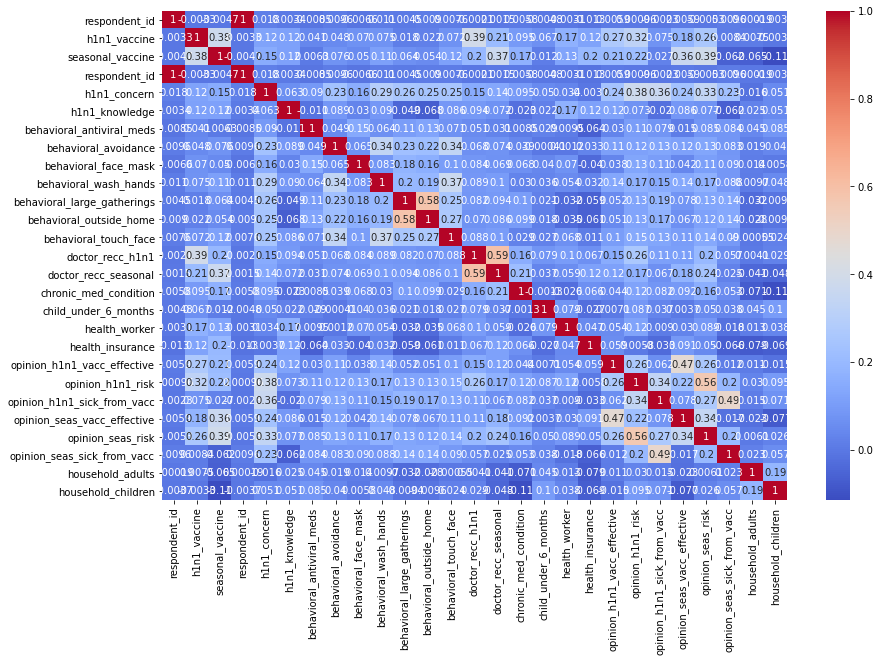

In [760]:
#check for multicollinearity
df_corr=df.corr()
print(df_corr)

plt.figure(figsize=(14,9))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

*********

<span style="color:red;">health_insurance </span>

since the insurance cannot be null values a person either has insurance or not.we will replace null with 0 to indicate no insurance

<span style="color:red;">H1N1 concern</span>

for H1N1 concern if the respondent had knowledge we will fill the null values for concern with 1 if the respondent had no knowledge we will fill the null with 0

<span style="color:red;">behavioral_antiviral_meds</span>

for behavioral_antiviral_meds we will fill the null values with the mode 
for behavioral_avoidance we will replce null based on the h1n1 concern with those that were highly concerned we will assume they avoided gatherings.

<span style="color:red;">behavioral_face_mask</span>

if the responded had knowledge about H1N1 and avoided contanct with others with flu like symptoms then we will fill the null values for face mask with 1 otherwise 0

<span style="color:red;">behavioral_wash_hands</span>

for behavioral_wash_hands if the respondent had knowldege and wore mask is an indication that the respondent took precautionary action of washing hands as well

<span style="color:red;">behavioral_large_gatherings</span>

for behavioral_large_gatherings if the respondent avoided close contanct with people who had flu-like symptoms then probably thier exposure to gatherings was reduced as well

 <span style="color:red;">behavioral_outside_home</span>

for behavioral_outside_home if the respondent avoided contanct withflu like symptoms and exposure to public gathering then the would have prefered to stay at home or reduce contact with people outside their household

<span style="color:red;">behavioral_touch_face</span>

for behavioral_touch_face if the respondent is knowlegdable ,has a face mask and washes hands then the respondent probbly avoided touching their eyes,nose or mouth

<span style="color:red;">doctor_recc_h1n1</span>

for doctor_recc_h1n1 if the respondent is very concerned of H1N1 and is knowledgable and has taken antiviral medication probably the vaccine they took was also recommended by the doctor either at the hospital or through the media

<span style="color:red;">doctor_recc_seasonal</span>

for doctor_recc_seasonal if the respondents H1N1 was reccomended by the doctor then probably the seasonal flu vaccines were recommended by the doctorthrough the same medium

<span style="color:red;">chronic_med_condition</span>

for chronic_med_condition for respondents with null values in chronic condition we will replace with 0 

**NB**
For the rest of the null columns will be replaced with thier mode values





******

In [761]:
#fill the null with zero
#health insurance
df['health_insurance']=df['health_insurance'].fillna(0)

#h1n1_concern
df['h1n1_concern'] = np.where(
    df['h1n1_knowledge'] >= 1,  # Condition
    df['h1n1_concern'].fillna(df['h1n1_knowledge']),  # Value if condition is True
    df['h1n1_concern'].fillna(0))

#h1n1 knowlegde
df['h1n1_knowledge']=np.where( 
    df['behavioral_antiviral_meds']>=1,
    df['h1n1_knowledge'].fillna(1),
    df['h1n1_knowledge'].fillna(0) )

#behavioral_antiviral_meds
mode_behavior=df['behavioral_antiviral_meds'].mode()[0]
df['behavioral_antiviral_meds']=df['behavioral_antiviral_meds'].fillna(mode_behavior)

#behavioral_avoidance
df['behavioral_avoidance']=np.where(df['h1n1_concern']==3,
                                   df['behavioral_avoidance'].fillna(1),
                                    df['behavioral_avoidance'].fillna(0))

#behavioral_face_mask
#if the responded had knowledge about H1N1 and avoided contanct with others with flu like symptoms then we will fill the null values for face mask with 1 otherwise 0
df['behavioral_face_mask']= np.where((df['h1n1_knowledge']>= 1) & (df['behavioral_avoidance']==1),
                                    df['behavioral_face_mask'].fillna(1),
                                    df['behavioral_face_mask'].fillna(0))

#for behavioral_wash_hands if the respondent had knowldege and wore mask is an indication that the respondent took precautionary action of washing hands as well
df['behavioral_wash_hands'] = np.where((df['h1n1_knowledge']>= 1) & (df['behavioral_face_mask']==1),
                                      df['behavioral_wash_hands'].fillna(1),
                                       df['behavioral_wash_hands'].fillna(0) )

# for behavioral_large_gatherings if the respondent avoided close contanct with people who had flu-like symptoms then probably thier exposure to gatherings was reduced as well
df['behavioral_large_gatherings']= np.where(df['behavioral_avoidance']==1,
                                            df['behavioral_large_gatherings'].fillna(1),
                                             df['behavioral_large_gatherings'].fillna(0))

# for behavioral_outside_home if the respondent avoided contanct withflu like symptoms and exposure to public gathering then the would have prefered to stay at home or reduce contact with people outside their household
df['behavioral_outside_home']=np.where( (df['behavioral_avoidance']==1) & (df['behavioral_large_gatherings']==1),
                                      df['behavioral_outside_home'].fillna(1),
                                       df['behavioral_outside_home'].fillna(0))

#for behavioral_touch_face if the respondent is knowlegdable ,has a face mask and washes hands then the respondent probbly avoided touching their eyes,nose or mouth
df['behavioral_touch_face']= np.where((df['h1n1_knowledge']>=1) & (df['behavioral_face_mask']==1) & (df['behavioral_wash_hands']==1),
                                     df['behavioral_touch_face'].fillna(1),
                                      df['behavioral_touch_face'].fillna(0))

#for doctor_recc_h1n1 if the respondent is very concerned of H1N1 and is knowledgable and has taken antiviral medication probably the vaccine they took was also recommended by the doctor either at the hospital or through the media
df['doctor_recc_h1n1']= np.where((df['h1n1_concern']==3) & (df['h1n1_knowledge']==2) & (df['behavioral_antiviral_meds']==1),
                                 df['doctor_recc_h1n1'].fillna(1),
                                 df['doctor_recc_h1n1'].fillna(0)) 

#for doctor_recc_seasonal if the respondents H1N1 was reccomended by the doctor then probably the seasonal flu vaccines were recommended by the doctorthrough the same medium
df['doctor_recc_seasonal']= np.where(df['doctor_recc_h1n1']==1,
                                    df['doctor_recc_seasonal'].fillna(1),
                                      df['doctor_recc_seasonal'].fillna(0)  ) 

#for chronic_med_condition for respondents with null values in chronic condition we will replace with 0 
df['chronic_med_condition']=df['chronic_med_condition'].fillna(0)

df['child_under_6_months'].fillna(df['child_under_6_months'].mode()[0], inplace=True)
df['health_worker'].fillna(df['health_worker'].mode()[0], inplace=True)
df['opinion_h1n1_vacc_effective'].fillna(df['opinion_h1n1_vacc_effective'].mode()[0], inplace=True)
df['opinion_h1n1_risk'].fillna(df['opinion_h1n1_risk'].mode()[0], inplace=True)
df['opinion_seas_vacc_effective'].fillna(df['opinion_seas_vacc_effective'].mode()[0], inplace=True)

df['opinion_h1n1_sick_from_vacc'].fillna(df['opinion_h1n1_sick_from_vacc'].mode()[0], inplace=True)
df['opinion_seas_risk'].fillna(df['opinion_seas_risk'].mode()[0], inplace=True)
df['opinion_seas_sick_from_vacc'].fillna(df['opinion_seas_sick_from_vacc'].mode()[0], inplace=True)
df['age_group'].fillna(df['age_group'].mode()[0], inplace=True)
df['race'].fillna(df['race'].mode()[0], inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['income_poverty'].fillna(df['income_poverty'].mode()[0], inplace=True)
df['marital_status'].fillna(df['marital_status'].mode()[0], inplace=True)
df['rent_or_own'].fillna(df['rent_or_own'].mode()[0], inplace=True)
df['employment_status'].fillna(df['employment_status'].mode()[0], inplace=True)
df['hhs_geo_region'].fillna(df['hhs_geo_region'].mode()[0], inplace=True)
df['census_msa'].fillna(df['census_msa'].mode()[0], inplace=True)
df['household_adults'].fillna(df['household_adults'].mode()[0], inplace=True)
df['household_children'].fillna(df['household_children'].mode()[0], inplace=True)
df['employment_industry'].fillna(df['employment_industry'].mode()[0], inplace=True)
df['employment_occupation'].fillna(df['employment_occupation'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)

df['child_under_6_months'].fillna(df['child_under_6_months'].mode()[0], inplace=True)
df['health_worker'].fillna(df['health_worker'].mode()[0], inplace=True)
df['opinion_h1n1_vacc_effective'].fillna(df['opinion_h1n1_vacc_effective'].mode()[0], inplace=True)
df['opinion_h1n1_risk'].fillna(df['opinion_h1n1_risk'].mode()[0], inplace=True)
df['opinion_h1n1_sick_from_vacc'].fillna(df['opinion_h1n1_sick_from_vacc'].mode()[0], inplace=True)
df['opinion_seas_vacc_effective'].fillna(df['opinion_seas_vacc_effective'].mode()[0], inplace=True)
df['opinion_seas_risk'].fillna(df['opinion_seas_risk'].mode()[0], inplace=True)
df['opinion_seas_sick_from_vacc'].fillna(df['opinion_seas_sick_from_vacc'].mode()[0], inplace=True)
df['household_adults'].fillna(df['household_adults'].mode()[0], inplace=True)
df['household_children'].fillna(df['household_children'].mode()[0], inplace=True)











c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [762]:
#seperate numerical from categorical columns
numericals=df.select_dtypes(include=['Float64','int64'])
categoricals=df.select_dtypes(include=['object'])

numerical_columns = numericals.columns.tolist()
categorical_columns = categoricals.columns.tolist()

print("num_col:",len(numerical_columns))
print("cat_col:",len(categorical_columns))

num_col: 27
cat_col: 12


In [763]:
#drop irrelevant columns
#categoricals=categoricals.drop(columns=['employment_occupation'])
categoricals=categoricals.drop(columns=['employment_industry','census_msa','employment_status','rent_or_own','hhs_geo_region','income_poverty'])


In [764]:
#impute numericals
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
numerical_imputed = imputer.fit_transform(numericals)
numerical_imputed_df = pd.DataFrame(numerical_imputed, columns=numericals.columns)
numericals=numerical_imputed_df

In [765]:
#hot encode the categorical data
encoder=OneHotEncoder(drop='first',sparse_output=False)
data_cat= categoricals
encoder.fit(data_cat)
encoded_data=encoder.transform(data_cat)
#create a new dataframe
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(data_cat.columns))

encoded_df

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_nan,race_Hispanic,race_Other or Multiple,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,employment_occupation_nan
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26704,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26705,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [766]:
#append the encoded data to numerical to make one dataframe
new_training_feat=numericals.join(encoded_df)
# new_training_feat.drop(axis=0, columns=['respondent_id'])
new_training_feat = new_training_feat.loc[:, ~new_training_feat.columns.duplicated()]
new_training_feat


,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,employment_occupation_nan
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26703,26703.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26704,26704.0,0.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26705,26705.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [767]:
new_training=new_training_feat
new_training

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,employment_occupation_nan
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26703,26703.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26704,26704.0,0.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26705,26705.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [768]:
null=new_training.isnull().sum()
print(null)
columns_with_nulls = null[null > 0]
columns_with_nulls

respondent_id                     0
h1n1_vaccine                      0
seasonal_vaccine                  0
h1n1_concern                      0
h1n1_knowledge                    0
                                 ..
employment_occupation_xgwztkwe    0
employment_occupation_xqwwgdyp    0
employment_occupation_xtkaffoo    0
employment_occupation_xzmlyyjv    0
employment_occupation_nan         0
Length: 63, dtype: int64


Series([], dtype: int64)

modelling

In [769]:
#split the dataset into x and y FOR H1N1
X=new_training.drop(columns=['h1n1_vaccine','seasonal_vaccine',])
y_h1n1= new_training['h1n1_vaccine']
X.shape,y_h1n1.shape

((26707, 61), (26707,))

In [770]:
#train test the variables
x_train,x_test,y_train,y_test= train_test_split(X,y_h1n1,test_size=0.2,random_state=42)

In [771]:
#look for the shape of training set
x_train.shape,y_train.shape

((21365, 61), (21365,))

In [772]:
#look for the shape of training set
x_test.shape,y_test.shape

((5342, 61), (5342,))

In [773]:
#import the necessary classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression



In [774]:
#defining the classifiers
names=["Nearest_Neighbors",
       "Decision_Tree","Random_Forest","Neural_Net","logistic_Regression",
       "Naive_Bayes"]
Classifiers=[KNeighborsClassifier(3),
            
            DecisionTreeClassifier(max_depth=5),
            RandomForestClassifier(max_depth=5,n_estimators=100),
            MLPClassifier(alpha=1,max_iter=1000),
            LogisticRegression(max_iter=1000),
            
            GaussianNB(),
            
            ]


In [775]:
#BUILD MODEL AND TEST ACCURACY SCORE
scores=[]
for name,clf in zip(names,Classifiers):
    clf.fit(x_train,y_train)
    score=clf.score(x_test,y_test)
    scores.append(score)
scores


[0.7437289404717334,
 0.8466866342193935,
 0.8229127667540247,
 0.8034444028453762,
 0.822163983526769,
 0.8038187944590042]

In [776]:
scores_df=pd.DataFrame()
scores_df['name'] = names
scores_df['score'] = scores
scores_df

,name,score
0,Nearest_Neighbors,0.743729
1,Decision_Tree,0.846687
2,Random_Forest,0.822913
3,Neural_Net,0.803444
4,logistic_Regression,0.822164
5,Naive_Bayes,0.803819


In [777]:
color_matrix=sns.light_palette("grey",as_cmap=True)
s=scores_df.style.background_gradient(cmap=color_matrix)
s

,name,score
0,Nearest_Neighbors,0.743729
1,Decision_Tree,0.846687
2,Random_Forest,0.822913
3,Neural_Net,0.803444
4,logistic_Regression,0.822164
5,Naive_Bayes,0.803819


**from the accuracy score logistic regression seems to be doing good,followed by neural network and decision tree.for H1N1 PREDICTOR**

In [810]:
#WE WILL REPEAT THE SAME PROCESS FOR SEASONAL VACCINE
X=new_training.drop(columns=['h1n1_vaccine','seasonal_vaccine'])
y_s_vacc= new_training['seasonal_vaccine']
#train test the decision tree
x_train1,x_test1,y_s_train,y_s_test= train_test_split(X,y_s_vacc,test_size=0.2,random_state=42)

#BUILD MODEL AND TEST ACCURACY SCORE
scores_sea_vacc=[]
for name,clf in zip(names,Classifiers):
    clf.fit(x_train1,y_s_train)
    score=clf.score(x_test1,y_s_test)
    scores_sea_vacc.append(score)

scores_df=pd.DataFrame()
scores_df['name'] = names
scores_df['score'] = scores_sea_vacc
scores_df

color_matrix=sns.light_palette("grey",as_cmap=True)
s=scores_df.style.background_gradient(cmap=color_matrix)
s



,name,score
0,Nearest_Neighbors,0.561962
1,Decision_Tree,0.762261
2,Random_Forest,0.770311
3,Neural_Net,0.707787
4,logistic_Regression,0.754586
5,Naive_Bayes,0.746724


**the accuracy scores of the model for the seaonal vaccine are within a range of 70s,with logistic being the best followed by 
neural network and decision tree**

Therefore the best model for this project is Logistic regression

In [779]:

#check for imbalance
print("Class distribution in y_train:")
print(y_train.value_counts())

print("Class distribution in y_s_train:")
print(y_s_train.value_counts())



Class distribution in y_train:
0.0    16821
1.0     4544
Name: h1n1_vaccine, dtype: int64
Class distribution in y_s_train:
0.0    11381
1.0     9984
Name: seasonal_vaccine, dtype: int64


In [812]:


#scale the data for H1N1
scaler =StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)


#solve imbalance
# Instantiate SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Apply SMOTE to the training data for h1n1_vaccine
X_train_smote_h1n1, y_train_smote_h1n1 = smote.fit_resample(x_train_scaled, y_train)

# Apply SMOTE to the training data for seasonal_vaccine
X_train_smote_seasonal, y_train_smote_seasonal = smote.fit_resample(x_train_scaled, y_s_train)






In [781]:
#check for imbalance
print("Class distribution in y_train:")
print(y_train_smote_h1n1.value_counts())

print("Class distribution in y_s_train:")
print(y_train_smote_seasonal.value_counts())

Class distribution in y_train:
1.0    16821
0.0    16821
Name: h1n1_vaccine, dtype: int64
Class distribution in y_s_train:
1.0    11381
0.0    11381
Name: seasonal_vaccine, dtype: int64


********

In [782]:


#instantiate logistic regression
logreg_h1n1=LogisticRegression(solver ='liblinear',class_weight='balanced')
logreg_seasonal=LogisticRegression(solver='liblinear',class_weight='balanced')



In [783]:
#fit the model to training data
logreg_h1n1.fit(X_train_smote_h1n1, y_train_smote_h1n1)
logreg_seasonal.fit(X_train_smote_seasonal, y_train_smote_seasonal )

LogisticRegression(class_weight='balanced', solver='liblinear')

In [784]:
#use cross validation to evaluaate expected accuracy
from sklearn.model_selection import cross_val_score
cv_score_h1n1=cross_val_score(logreg_h1n1,X_train_smote_h1n1,y_train_smote_h1n1,cv=3)
y_h1n1_pred=logreg_h1n1.predict(x_test_scaled)
cv_score_seasonal = cross_val_score(logreg_seasonal,X_train_smote_seasonal,y_train_smote_seasonal,cv=3)
y_seasonal_pred= logreg_seasonal.predict(x_test_scaled)
print("Predictions for h1n1_vaccine:",y_h1n1_pred)
print("Predictions for seasonal_vaccine:", y_seasonal_pred)


Predictions for h1n1_vaccine: [0. 0. 0. ... 1. 0. 0.]
Predictions for seasonal_vaccine: [0. 0. 1. ... 1. 1. 1.]


In [785]:
#evaluation metrics for H1N1
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

model_accuracy = accuracy_score(y_test,y_h1n1_pred)
model_recall = recall_score(y_test,y_h1n1_pred)
model_precision = precision_score(y_test,y_h1n1_pred)
model_f1 = f1_score(y_test,y_h1n1_pred)


print(f"""
Accuracy: {model_accuracy:1.3f}
Recall:{model_recall:1.3f}
Precision:  {model_precision:1.3f}
F1 Score: {model_f1:1.3f}
""")


Accuracy: 0.799
Recall:0.759
Precision:  0.517
F1 Score: 0.615



Accuracy: 0.800: This means that 80% of the predictions were correct. However, accuracy alone can be misleading, especially in cases of class imbalance.

Recall: 0.756: This indicates that the model correctly identified 75.6% of the actual positive cases. A recall close to 1 means the model is good at finding all the positive cases, but it may also include some false positives.

Precision: 0.518: Precision is relatively low, meaning that when the model predicts a positive class, only 51.8% of those predictions are actually correct. This could be a sign that the model is making quite a few false positive predictions.

F1 Score: 0.615: The F1 score is the harmonic mean of precision and recall, providing a balance between the two. An F1 score of 0.615 suggests there's room for improvement in balancing precision and recall.

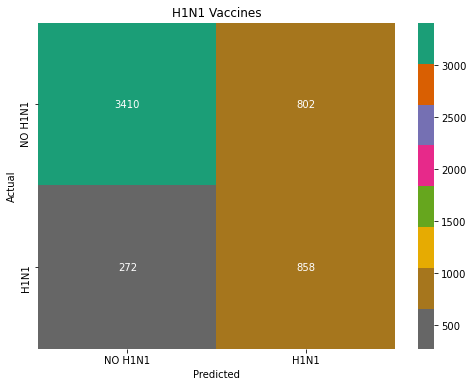

In [786]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_h1n1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap= 'Dark2_r', 
            xticklabels=['NO H1N1', 'H1N1'], 
            yticklabels=['NO H1N1', 'H1N1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('H1N1 Vaccines')
plt.show()

In [787]:
#evaluation metrics for Seasonal Vaccines

model_accuracy = accuracy_score(y_test,y_seasonal_pred)
model_recall = recall_score(y_test,y_seasonal_pred)
model_precision = precision_score(y_test,y_seasonal_pred)
model_f1 = f1_score(y_test,y_seasonal_pred)


print(f"""
Accuracy: {model_accuracy:1.3f}
Recall:{model_recall:1.3f}
Precision:  {model_precision:1.3f}
F1 Score: {model_f1:1.3f}
""")


Accuracy: 0.634
Recall:0.742
Precision:  0.335
F1 Score: 0.462



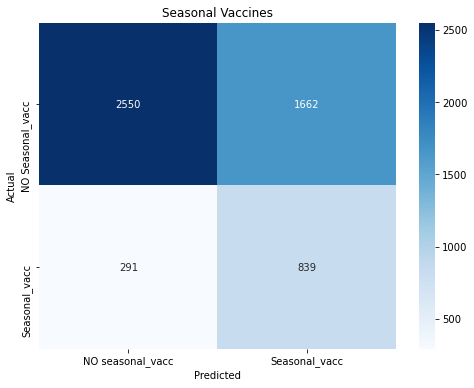

In [788]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_seasonal_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['NO seasonal_vacc', 'Seasonal_vacc'], 
            yticklabels=['NO Seasonal_vacc', 'Seasonal_vacc'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Seasonal Vaccines')
plt.show()

High Recall but Lower Precision: The model is good at identifying positive cases (high recall), but it often predicts positive when it shouldn't (low precision). This is common in imbalanced datasets where the model is trying to find all instances of the minority class.

Accuracy vs. F1 Score: While the accuracy is relatively high at 80%, the F1 score being lower (0.615) suggests that the model's performance is not as strong when it comes to correctly balancing false positives and false negatives. The F1 score is a more reliable indicator in cases where precision and recall are not balanced.
The model might need feature engineering or changing the model since it 

In [789]:
from sklearn.metrics import roc_curve, auc

y_h1n1_score = logreg_h1n1.fit(X_train_smote_h1n1, y_train_smote_h1n1).decision_function(x_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_h1n1_score)

print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.8598259082772358


The AUC of 86% is not bad it indicates that the model has a high capacity in distinguishing positive and negative H1N1 cases.

In [790]:


y_seasonal_score = logreg_seasonal.fit(X_train_smote_seasonal, y_train_smote_seasonal).decision_function(x_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_seasonal_score)

print('AUC: {}'.format(auc(fpr, tpr)))



AUC: 0.7237761473749674


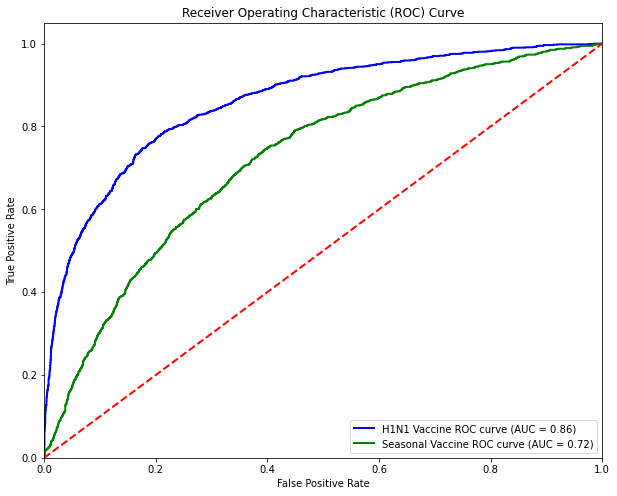

In [791]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for H1N1 vaccine prediction
fpr_h1n1, tpr_h1n1, _ = roc_curve(y_test, y_h1n1_score)
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)

# Calculate ROC curve and AUC for seasonal vaccine prediction
fpr_seasonal, tpr_seasonal, _ = roc_curve(y_test, y_seasonal_score)
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_h1n1, tpr_h1n1, color='blue', lw=2, label='H1N1 Vaccine ROC curve (AUC = {:.2f})'.format(roc_auc_h1n1))
plt.plot(fpr_seasonal, tpr_seasonal, color='green', lw=2, label='Seasonal Vaccine ROC curve (AUC = {:.2f})'.format(roc_auc_seasonal))

# Plotting the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

# Adding labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


# Decision Treee

In [917]:
dt_clf_h1n1=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=7,min_samples_split=5,min_samples_leaf=3,max_features='log2',min_impurity_decrease=0.01)
dt_clf_h1n1.fit(X_train_smote_h1n1,y_train_smote_h1n1)


dt_clf_seasonal=DecisionTreeClassifier(criterion='entropy')
dt_clf_seasonal.fit(X_train_smote_seasonal,y_train_smote_seasonal)



DecisionTreeClassifier(criterion='entropy')

In [918]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)
model.fit(X_train_smote_h1n1, y_train_smote_h1n1)



Ridge(alpha=0.1)

In [919]:
#predict
y_dt_h1n1_pred=dt_clf_h1n1.predict(x_test_scaled)
y_dt_seasonal_pred=dt_clf_seasonal.predict(x_test_scaled)


In [920]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
acc_h1n1=accuracy_score(y_test,y_dt_h1n1_pred)
acc_h1n1

0.7884687383002621

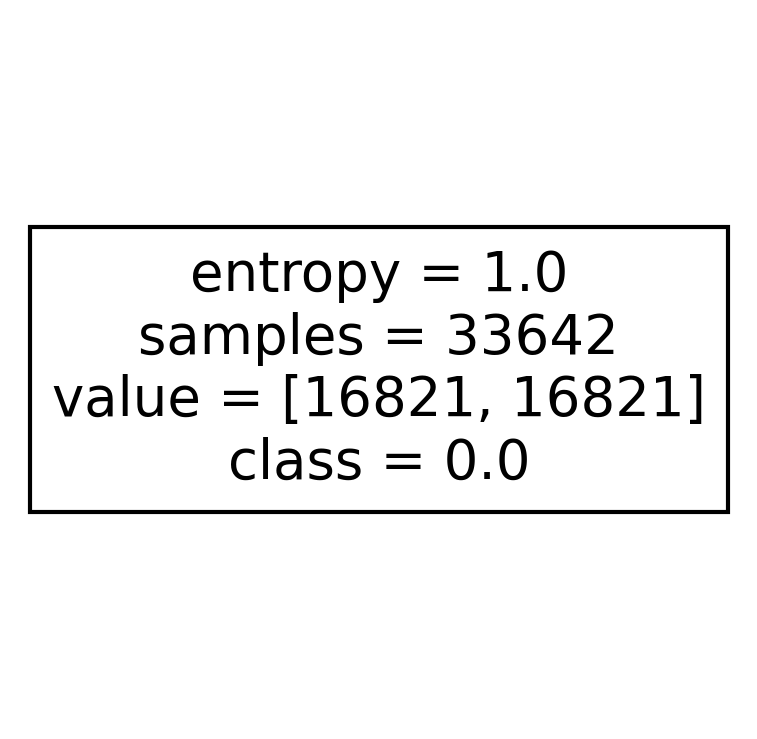

In [921]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(dt_clf_h1n1,
               feature_names = new_training.columns, 
               class_names=np.unique(y_train_smote_h1n1).astype('str'),
               filled = True)
plt.show()

In [922]:
ypred_h1= dt_clf_h1n1.predict(x_test_scaled)

# Calculate accuracy 
acc = accuracy_score(y_test,ypred_h1)
print('Accuracy is :{0}'.format(acc))

Accuracy is :0.7884687383002621


In [923]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,ypred_h1)
roc_auc = roc_auc_score(y_test,ypred_h1)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))



AUC is :0.5



Confusion Matrix
----------------


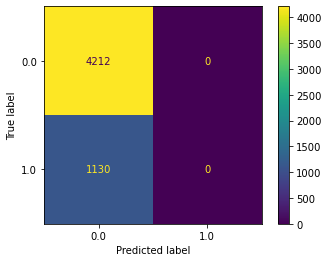

In [924]:
# Create and print a confusion matrix 

ConfusionMatrixDisplay.from_predictions(y_test,ypred_h1)

print('\nConfusion Matrix')
print('----------------')

In [882]:
#for seasonal
acc_seasonal=accuracy_score(y_test,y_dt_seasonal_pred)
acc_seasonal

0.3414451516286035

In [883]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_dt_seasonal_pred)
roc_auc = roc_auc_score(y_test,y_dt_seasonal_pred)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.53



Confusion Matrix
----------------


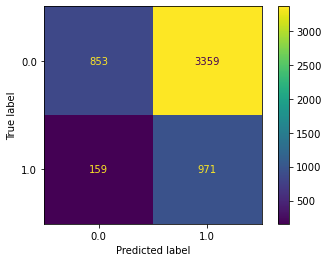

In [884]:
# Create and print a confusion matrix 

ConfusionMatrixDisplay.from_predictions(y_test,y_dt_seasonal_pred)

print('\nConfusion Matrix')
print('----------------')